# Load models

Flags for the models (vocabulary size: 30000)

m0 : model for the whole Kanseki Repository

m1 : models for six parts (６部)

m2 : models for 75 divisions (75部類)

Vocabulary size: 20000

m5 : : models for 75 divisions (75部類)


In [1]:
import krp_sp as k
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import pandas as pd

# load the log values : , log=True
ms, md, mv = k.loadmodels(flag="m2", use_krp_names=False)
len(md)

75

Load random samples from the data files 

In [3]:
smp = k.loadsamples()

In [4]:
print(smp[1])

('書類', ['天下之父歸之民心之趨向可知矣若是三篇果出於其手武王尤當名之也大明之詩曰殷商之旅其㑹如林其卒曰維師尚父時維鷹揚凉彼武王肆伐大商㑹朝清明乃知武王非太公未必成事則太誓之名亦與書序伊尹相湯伐桀之意同也學者又', '葢其善根将𤼵而習惡尤勝伊尹于此時知其不可以口舌争也于是謀之于羣臣之中求所以轉移太甲之心以謂兹乃不義之事其習與性成矣太甲之性本來無此特為習所勝則性亦與習成予不可使狎近于不順之人于是營桐宫桐宫乃成湯所葬之', '放驩兠于崇山竄三苗于三危殛鯀于羽山四罪而天下咸服(流遣之/逺去如)(水之流也放置之於此不得他適也竄則驅逐禁錮之/殛則拘囚困苦之隨其罪之輕重而異法也共工驩兠)(鯀事見上篇三苗國名在江南荆揚之間恃險為亂者', '。」允懷于茲，道積于厥躬。惟「斅學半」，「念終始典于學」，厥德脩罔覺。監于先王成憲，其永無愆。惟說式克欽承，旁招俊乂，列于庶位。王曰：嗚呼！說！四海之內，咸仰朕德，時乃風。股肱惟人，良臣惟聖。昔先正', '行方伯之/職以司牧人自任也遺之牛羊使亳衆為之耕將與之)(同善也而傲虐滋甚/不可訓誨於是征之)伊尹去亳適夏既醜有夏復歸于亳入自北門乃遇汝鳩汝方作汝鳩汝方(伊氏尹名經尹躬暨湯則名也或/曰名摯尹正也官名孔氏'])


In [5]:
def getbest(md, sntc, mv=None, cnt=3):
    """Get the best result for the sentence provided. Optionally, return cnt results. SMP is the loaded list of models. Optionally provide a list with log values."""
    res=[]
    for i, mx in enumerate(md):
        ids = mx.encode_as_ids(sntc)
        if mv:
            r = sum([mv[i][a] for a in ids]) / len(ids)
        else:
            r = sum(ids) / len(ids)
        res.append((i, r))
    resx=sorted(res, key=lambda x: x[1], reverse=True)
    #print(resx)
    return [a[0] for a in resx[0:cnt]]


In [6]:
k.getbest(md, smp[1][0][1], None, 1)

[23]

In [7]:
from collections import defaultdict
kn=dict([(a[1],a[0]) for a in k.krp_names.items()])
smpres=[]
for s in smp:
    d=defaultdict(int)
    n=kn[s[0]]
    for s1 in s[1]:
        res=[ms[a] for a in getbest(md, s1)]
        for i, rx in enumerate(res):
            score= 3 - i
            d[rx] += score
    dr = sorted(d.items(), key = lambda i: i[1], reverse=True)
    cr = sum([a[1] for a in dr if a[0]==n])
    smpres.append (("%s%s" % (n,s[0]), cr, ",".join(["%s:%s" % a for a in dr])))

In [8]:
df=pd.DataFrame(smpres)
print(df)

             0   1                                                  2
0       KR1a易類   3  KR1f:6,KR6n:6,KR6l:4,KR6c:4,KR1a:3,KR6i:2,KR6k...
1       KR1b書類   0  KR6n:5,KR6i:3,KR2f:3,KR2m:3,KR6l:3,KR6f:3,KR4d...
2       KR1c詩類   0  KR3e:8,KR6v:3,KR6i:3,KR6c:3,KR6b:3,KR3j:2,KR6h...
3       KR1d禮類   0  KR6n:9,KR6c:7,KR2f:3,KR6j:2,KR3f:2,KR6l:2,KR6a...
4      KR1e春秋類   0  KR6n:7,KR6l:5,KR6f:4,KR1f:3,KR6k:3,KR6c:2,KR2f...
5      KR1f孝經類  15  KR1f:15,KR6l:4,KR3e:3,KR4a:2,KR6n:2,KR2c:2,KR2...
6    KR1g五經總義類   0  KR6n:10,KR6l:5,KR6a:4,KR4d:3,KR4h:2,KR6r:2,KR6...
7      KR1h四書類   0  KR1f:9,KR2f:4,KR4h:4,KR3a:4,KR6n:3,KR3f:2,KR3e...
8       KR1i樂類   1  KR6e:5,KR6n:4,KR6o:3,KR6k:3,KR3f:3,KR6h:3,KR5i...
9      KR1j小學類   0  KR6n:6,KR6l:4,KR6k:4,KR1a:3,KR6c:3,KR6f:3,KR3f...
10     KR2a正史類   0  KR6n:6,KR6a:5,KR1f:3,KR6k:3,KR2b:3,KR6e:3,KR6f...
11     KR2b編年類   1  KR6n:9,KR2f:5,KR6a:4,KR3e:3,KR6m:2,KR6l:2,KR6f...
12   KR2c紀事本末類   0  KR3e:6,KR6n:6,KR6k:4,KR2a:3,KR6l:3,KR6h:2,KR6e...
13     KR2d別史類   0  

In [9]:
len(mv[0])

30000

How many characters are in every vocab list?

In [10]:
from collections import defaultdict
vd=defaultdict(int)
for vl in mv:
    for v in vl:
        vd[v] += 1
vtab=defaultdict(int)
for v in vd.items():
    vtab[v[1]] += 1

In [11]:
vds = sorted(vtab.items(), key = lambda i: i[0], reverse=True)
vds[0:10]

[(75, 1503),
 (74, 432),
 (73, 313),
 (72, 259),
 (71, 213),
 (70, 162),
 (69, 169),
 (68, 170),
 (67, 170),
 (66, 168)]

Turn the vocabulary list of list around, list by sp

In [12]:
from collections import defaultdict
vx=defaultdict(list)
for i, vl in enumerate(mv):
    for v in vl:
        vx[v].append(ms[i])


Look at vocab entries with only 2 occurrences

In [13]:
v2 = [a for a in vx.items() if len(a[1]) == 2]
vd2 = defaultdict(lambda: defaultdict(int))
for vdn in v2:
    l1 = vdn[1][0]
    l2 = vdn[1][1]
    vd2[l1][l2]+=1


In [18]:
o = []
for g1 in vd2:
    for g2 in vd2[g1]:
        w = vd2[g1][g2]
        if w > 10:
            o.append((g1, g2, w))

In [21]:
G = nx.MultiGraph()
#o=[(g1, g2, vd2[g1][g2]) for g2 in vd2[g1] for g1 in vd2 if vd2[g1][g2] > 10]
G.add_weighted_edges_from(o)
        

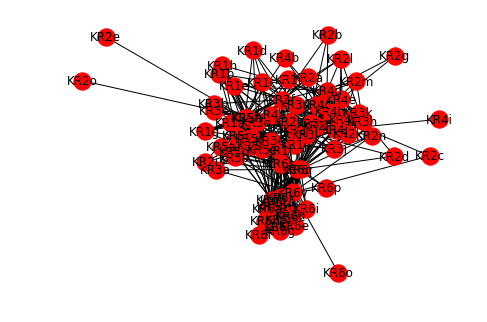

In [22]:
nx.draw(G, with_labels=True, figsize=(2000, 2000))

In [ ]:
for k in G.nodes():
    print (k, G[k].items())

In [ ]:
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt

font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Thin.ttc"
prop = mfm.FontProperties(fname=font_path)
plt.text(0.5, 0.5, s='测试', fontproperties=prop, size='40')
plt.show()

In [23]:
#kn=k.krp_names
#o=[("%s%s" % (a[0],kn[a[0]]), "%s%s" % (a[1], kn[a[1]]), a[2]) for a in o]
o=sorted(o, key = lambda x : x[2], reverse=True)
df=pd.DataFrame(o)

In [24]:
print(df)

        0     1     2
0    KR3e  KR5e  1482
1    KR6l  KR6n  1469
2    KR6q  KR6r  1141
3    KR1j  KR6s   992
4    KR5b  KR5g   746
5    KR3c  KR5f   691
6    KR6a  KR6b   611
7    KR6f  KR6h   421
8    KR5a  KR5g   389
9    KR3e  KR5d   378
10   KR3e  KR3i   367
11   KR5e  KR5g   367
12   KR6b  KR6h   289
13   KR4d  KR4e   281
14   KR6e  KR6n   268
15   KR5a  KR5b   261
16   KR6a  KR6k   255
17   KR5c  KR5i   247
18   KR2n  KR3h   245
19   KR6c  KR6v   244
20   KR6d  KR6g   240
21   KR6m  KR6n   233
22   KR1a  KR5h   226
23   KR5c  KR5h   219
24   KR5a  KR5i   218
25   KR1j  KR3j   203
26   KR6b  KR6k   196
27   KR6a  KR6l   194
28   KR3i  KR4j   194
29   KR2j  KR3i   192
..    ...   ...   ...
487  KR5f  KR6k    11
488  KR3e  KR3l    11
489  KR1g  KR4c    11
490  KR2j  KR3h    11
491  KR5b  KR6r    11
492  KR6i  KR6r    11
493  KR6l  KR6r    11
494  KR5a  KR6r    11
495  KR5h  KR6r    11
496  KR2j  KR4d    11
497  KR1e  KR4d    11
498  KR1a  KR4a    11
499  KR1d  KR4a    11
500  KR3f 

In [ ]:
for node, nbrsdict in G.adj.items():
    print (node, nbrsdict)